# COVID-19 Argentina por RJC

In [87]:
import os              # This provides several system utilities
import pandas as pd    # This is the workhorse of data munging in Python
import matplotlib.pyplot as plt
import seaborn as sns  # This allows us to easily and beautifully plot

# This ensures visualizations are plotted inside the notebook
%matplotlib inline

### Abro archivo con los datos del gobierno, Tasa diaria de contagios y muertos, total de recuperados y de tests

In [88]:
f = 'Covid19_Arg.txt'    # Path to file containing the file
df = pd.read_csv(f, comment='#')    # Read csv file with comma sepparation
df.tail(10)

,Fecha,Contagios,Muertos,Recuperados_tot,Tests
250,11/10/2020,11977,279,"1,081,897","3,289,756"
251,11/11/2020,10880,348,"1,091,038","3,346,229"
252,11/12/2020,11163,250,"1,100,180","3,377,749"
253,11/13/2020,11859,264,"1,110,477","3,409,487"
254,11/14/2020,8468,262,"1,119,366","3,434,801"
255,11/15/2020,5645,128,"1,129,102","3,452,519"
256,11/16/2020,7893,292,"1,140,196","3,474,091"
257,11/17/2020,10621,379,"1,148,833","3,508,664"
258,11/18/2020,10332,241,"1,156,474","3,536,386"
259,11/19/2020,10097,186,"1,167,514","3,585,077"


### Separo por comas y indexto los dias a la tabla para graficar facilmente

In [89]:
df.set_index(pd.DatetimeIndex(df['Fecha']),inplace=True)
df.drop('Fecha', axis=1, inplace=True)
#df['Recuperados_tot'] = pd.to_numeric(df['Recuperados_tot'])

df.tail(10) #ultimos 10 valores

,Contagios,Muertos,Recuperados_tot,Tests
Fecha,,,,
2020-11-10,11977,279,"1,081,897","3,289,756"
2020-11-11,10880,348,"1,091,038","3,346,229"
2020-11-12,11163,250,"1,100,180","3,377,749"
2020-11-13,11859,264,"1,110,477","3,409,487"
2020-11-14,8468,262,"1,119,366","3,434,801"
2020-11-15,5645,128,"1,129,102","3,452,519"
2020-11-16,7893,292,"1,140,196","3,474,091"
2020-11-17,10621,379,"1,148,833","3,508,664"
2020-11-18,10332,241,"1,156,474","3,536,386"


### Calculo la tasa diaria de recuperados, activos y tests

In [90]:
df['Recuperados'] = df['Recuperados_tot'].diff()
df['Tests_diario'] = df['Tests'].diff()
df['Activos']=df['Contagios']-df['Recuperados']-df['Muertos']
df['Activos'] = pd.to_numeric(df['Activos'])
df.tail(10)

,Contagios,Muertos,Recuperados_tot,Tests,Recuperados,Tests_diario,Activos
Fecha,,,,,,,
2020-11-10,11977,279,"1,081,897","3,289,756","8,320","31,535","3,378"
2020-11-11,10880,348,"1,091,038","3,346,229","9,141","56,473","1,391"
2020-11-12,11163,250,"1,100,180","3,377,749","9,142","31,520","1,771"
2020-11-13,11859,264,"1,110,477","3,409,487","10,297","31,738","1,298"
2020-11-14,8468,262,"1,119,366","3,434,801","8,889","25,314",-683
2020-11-15,5645,128,"1,129,102","3,452,519","9,736","17,718","-4,219"
2020-11-16,7893,292,"1,140,196","3,474,091","11,094","21,572","-3,493"
2020-11-17,10621,379,"1,148,833","3,508,664","8,637","34,573","1,605"
2020-11-18,10332,241,"1,156,474","3,536,386","7,641","27,722","2,450"


### Calculo el total de contagios, muertos y activos

In [91]:
df['Contagios_tot'] = df['Contagios'].cumsum()
df['Muertos_tot'] = df['Muertos'].cumsum()
df['Activos_tot']=df['Contagios_tot']-df['Recuperados_tot']-df['Muertos_tot']

pd.options.display.float_format = '{:,.0f}'.format #en enteros sin coma
df.tail(10)

,Contagios,Muertos,Recuperados_tot,Tests,Recuperados,Tests_diario,Activos,Contagios_tot,Muertos_tot,Activos_tot
Fecha,,,,,,,,,,
2020-11-10,11977,279,"1,081,897","3,289,756","8,320","31,535","3,378",1262476,34183,"146,396"
2020-11-11,10880,348,"1,091,038","3,346,229","9,141","56,473","1,391",1273356,34531,"147,787"
2020-11-12,11163,250,"1,100,180","3,377,749","9,142","31,520","1,771",1284519,34781,"149,558"
2020-11-13,11859,264,"1,110,477","3,409,487","10,297","31,738","1,298",1296378,35045,"150,856"
2020-11-14,8468,262,"1,119,366","3,434,801","8,889","25,314",-683,1304846,35307,"150,173"
2020-11-15,5645,128,"1,129,102","3,452,519","9,736","17,718","-4,219",1310491,35435,"145,954"
2020-11-16,7893,292,"1,140,196","3,474,091","11,094","21,572","-3,493",1318384,35727,"142,461"
2020-11-17,10621,379,"1,148,833","3,508,664","8,637","34,573","1,605",1329005,36106,"144,066"
2020-11-18,10332,241,"1,156,474","3,536,386","7,641","27,722","2,450",1339337,36347,"146,516"


### Interpolaciones

In [92]:
import numpy as np
N=7
df["Contagios_MA"]=df.Contagios.rolling(window=N).mean()
df["Recuperados_MA"]=df.Recuperados.rolling(window=N).mean()
df["Muertos_MA"]=df.Muertos.rolling(window=N).mean()
df["Tests_diario_MA"]=df.Tests_diario.rolling(window=N).mean()

### Grafico de tasa diaria

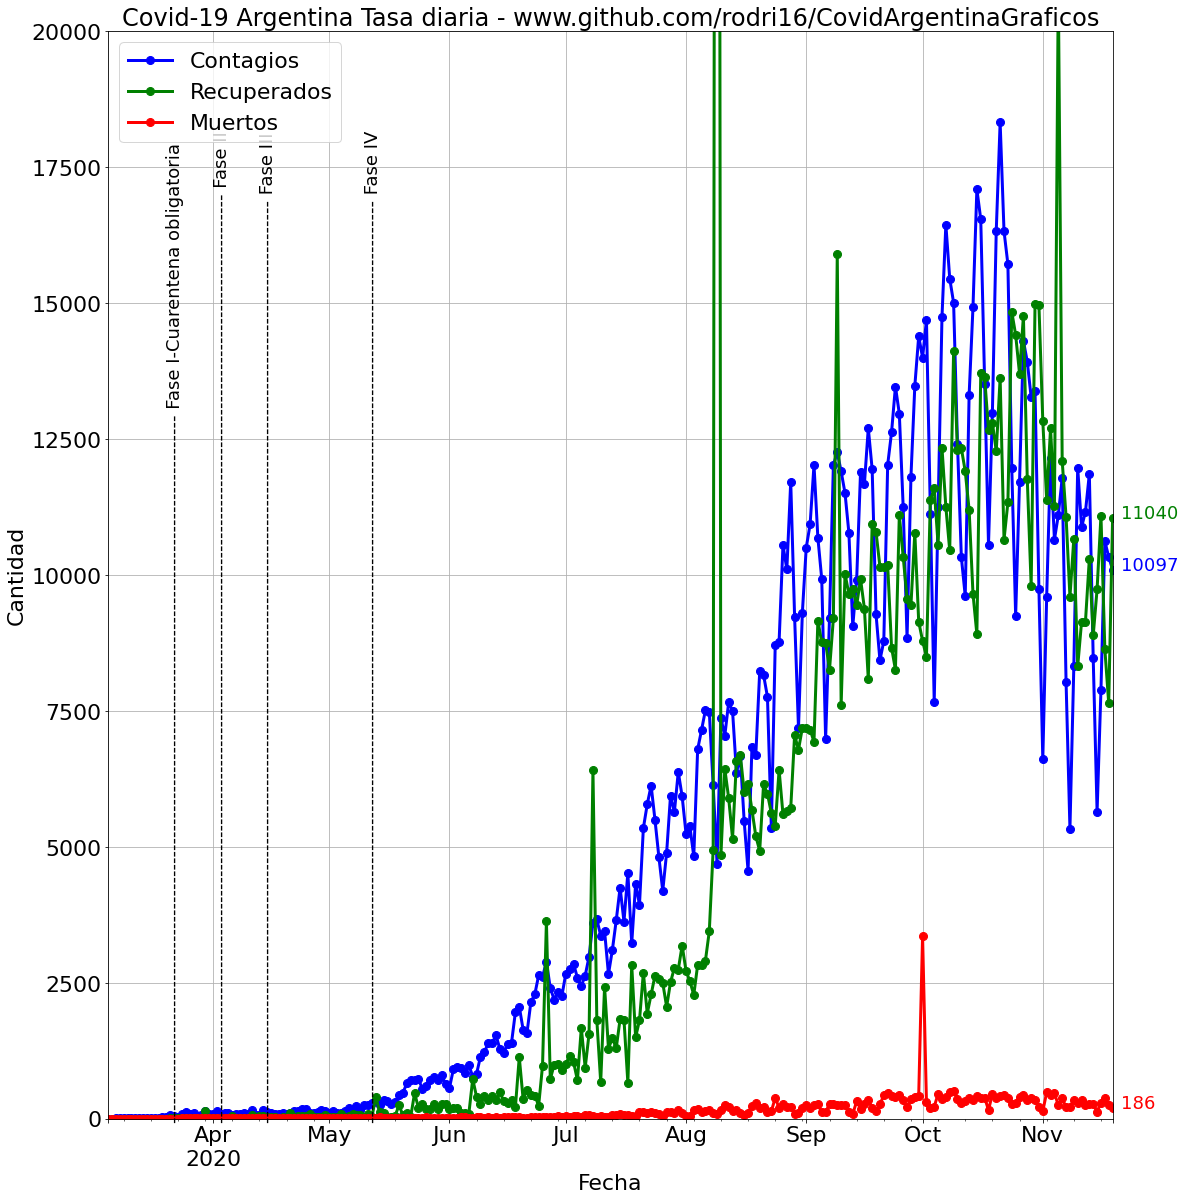

In [93]:
ax=df.plot(y=['Contagios','Recuperados','Muertos'], color=['blue',"green",'red'],legend='true',style='-',grid='on',figsize=(18,20),linewidth=3, marker='o', markersize=8, fontsize=22)

plt.title('Covid-19 Argentina Tasa diaria - www.github.com/rodri16/CovidArgentinaGraficos',fontsize=24)
plt.legend(['Contagios', 'Recuperados',"Muertos"],loc='upper left', fontsize=22);
plt.ylabel('Cantidad', fontsize=22)
plt.xlabel('Fecha', fontsize=22)
#ax.text('2020-4-2',280,'https://github.com/rodri16/CovidArgentinaGraficos',fontsize=10)
#agrega ultimo numero
#for var in (df.Contagios,df.Recuperados,df.Muertos):
#    plt.annotate('%d' % var.iloc[-1], xy=(1, var.iloc[-1]), xytext=(8, 0), 
#                 xycoords=('axes fraction', 'data'), textcoords='offset points')
    
plt.annotate('%d' % df.Contagios.iloc[-1], xy=(1, df.Contagios.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',color='blue',size=18)
plt.annotate('%d' % df.Recuperados.iloc[-1], xy=(1, df.Recuperados.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',color='green',size=18)
plt.annotate('%d' % df.Muertos.iloc[-1], xy=(1, df.Muertos.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',color='red',size=18)

    # Add labels to the plot
style = dict(size=18, color='black')    
#Texto de la cuarentena obligatoria
ax.text('2020-3-20', 10, "------------------------------------------------------------------------------------------------------------- Fase I-Cuarentena obligatoria",rotation=90, **style)
#Texto de la Fase II
ax.text('2020-4-1', 10, "----------------------------------------------------------------------------------------------------------------------------------------------- Fase II",rotation=90, **style)
#Texto de la Fase III
ax.text('2020-4-13', 10, "---------------------------------------------------------------------------------------------------------------------------------------------- Fase III",rotation=90, **style)
#Texto de la Fase IV
ax.text('2020-5-10', 10, "---------------------------------------------------------------------------------------------------------------------------------------------- Fase IV",rotation=90, **style)


#valor minimo eje y = 0
plt.gca().set_ylim(bottom=0,top=20000)


#Salvo el grafico con la ultima fecha
name='Graficos/Noviembre/TasaDiariaLine_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name, bits=16)

### Subolots con la media de cada grafico

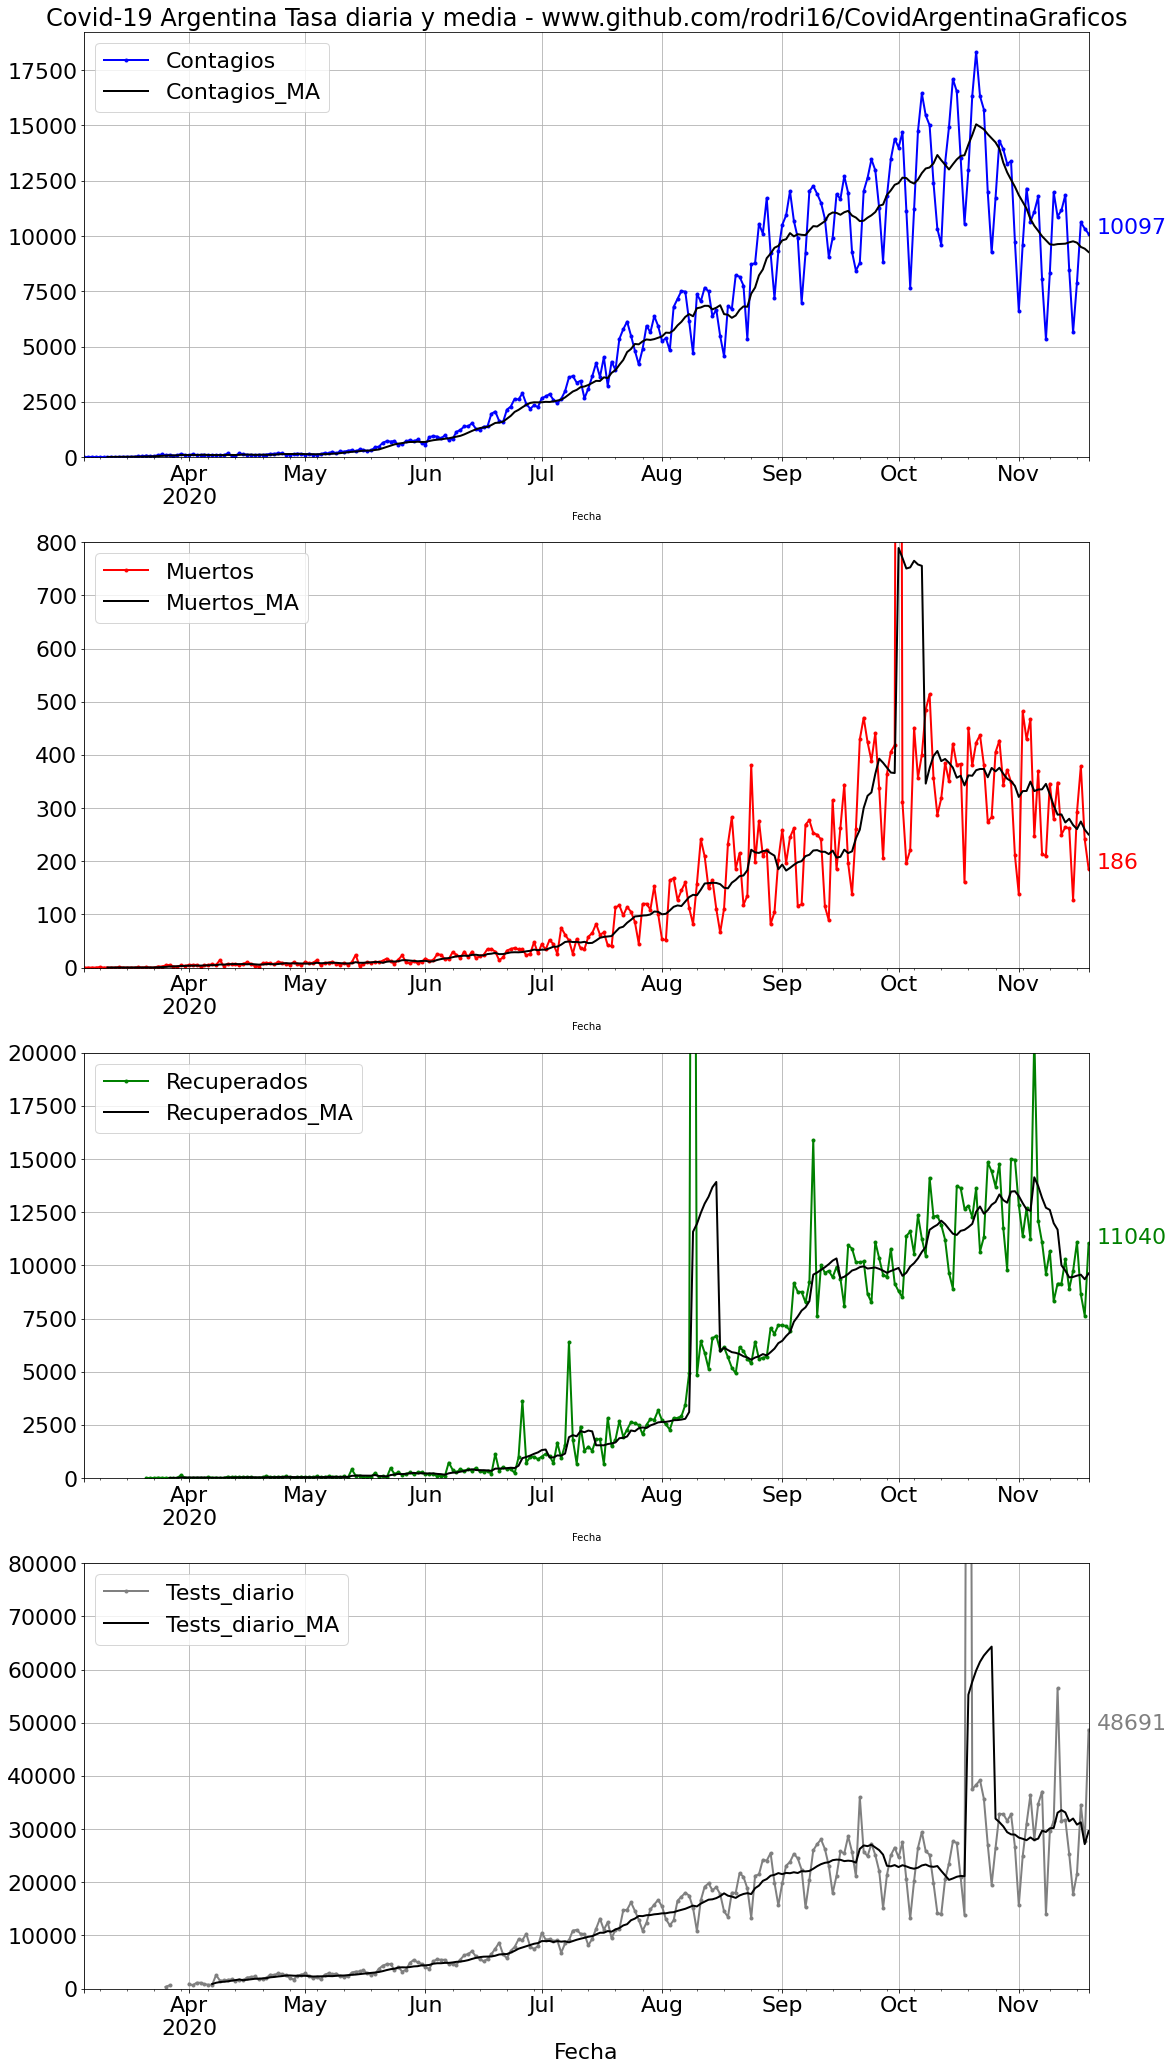

In [94]:
fig, axs = plt.subplots(4,1)

#ax=df.plot(y=['Contagios','Contagios_MA','Muertos','Recuperados','Tests_diario'],color=['blue','red',"green",'grey'],figsize=(18,22),subplots='true',style='.-',grid='on',linewidth=2, marker='o', fontsize=22)#df[df['Contagios_tot'] > 100]
plt.xlabel('Fecha', fontsize=22)

df.plot(y=['Contagios','Contagios_MA'],color=['blue','black'],figsize=(18,36),style=['.-',''],grid='on',linewidth=2, fontsize=22,ax=axs[0])
axs[0].set_title('Covid-19 Argentina Tasa diaria y media - www.github.com/rodri16/CovidArgentinaGraficos',fontsize=24)

axs[0].annotate('%d' % df.Contagios.iloc[-1], xy=(1, df.Contagios.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="blue")  
axs[0].set_ylim(bottom=0)
axs[0].legend(fontsize=22)

df.plot(y=['Muertos','Muertos_MA'],color=['red','black'],figsize=(18,36),style=['.-','-'],grid='on',linewidth=2, fontsize=22,ax=axs[1])
axs[1].annotate('%d' % df.Muertos.iloc[-1], xy=(1, df.Muertos.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="red") 
axs[1].set_ylim(bottom=0,top=800)
axs[1].legend(fontsize=22)


df.plot(y=['Recuperados','Recuperados_MA'],color=['green','black'],figsize=(18,36),style=['.-','-'],grid='on',linewidth=2, fontsize=22,ax=axs[2])
axs[2].annotate('%d' % df.Recuperados.iloc[-1], xy=(1, df.Recuperados.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="green") 
axs[2].set_ylim(bottom=0,top=20000)
axs[2].legend(fontsize=22)

df.plot(y=['Tests_diario','Tests_diario_MA'],color=['grey','black'],figsize=(18,36),style=['.-','-'],grid='on',linewidth=2, fontsize=22,ax=axs[3])

axs[3].annotate('%d' % df.Tests_diario.iloc[-1], xy=(1, df.Tests_diario.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="grey") 
axs[3].set_ylim(bottom=0, top=80000)
axs[3].legend(fontsize=22)

name='Graficos/Noviembre/TasaDiaria_MA_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

### Grafico de barras de los tests diarias

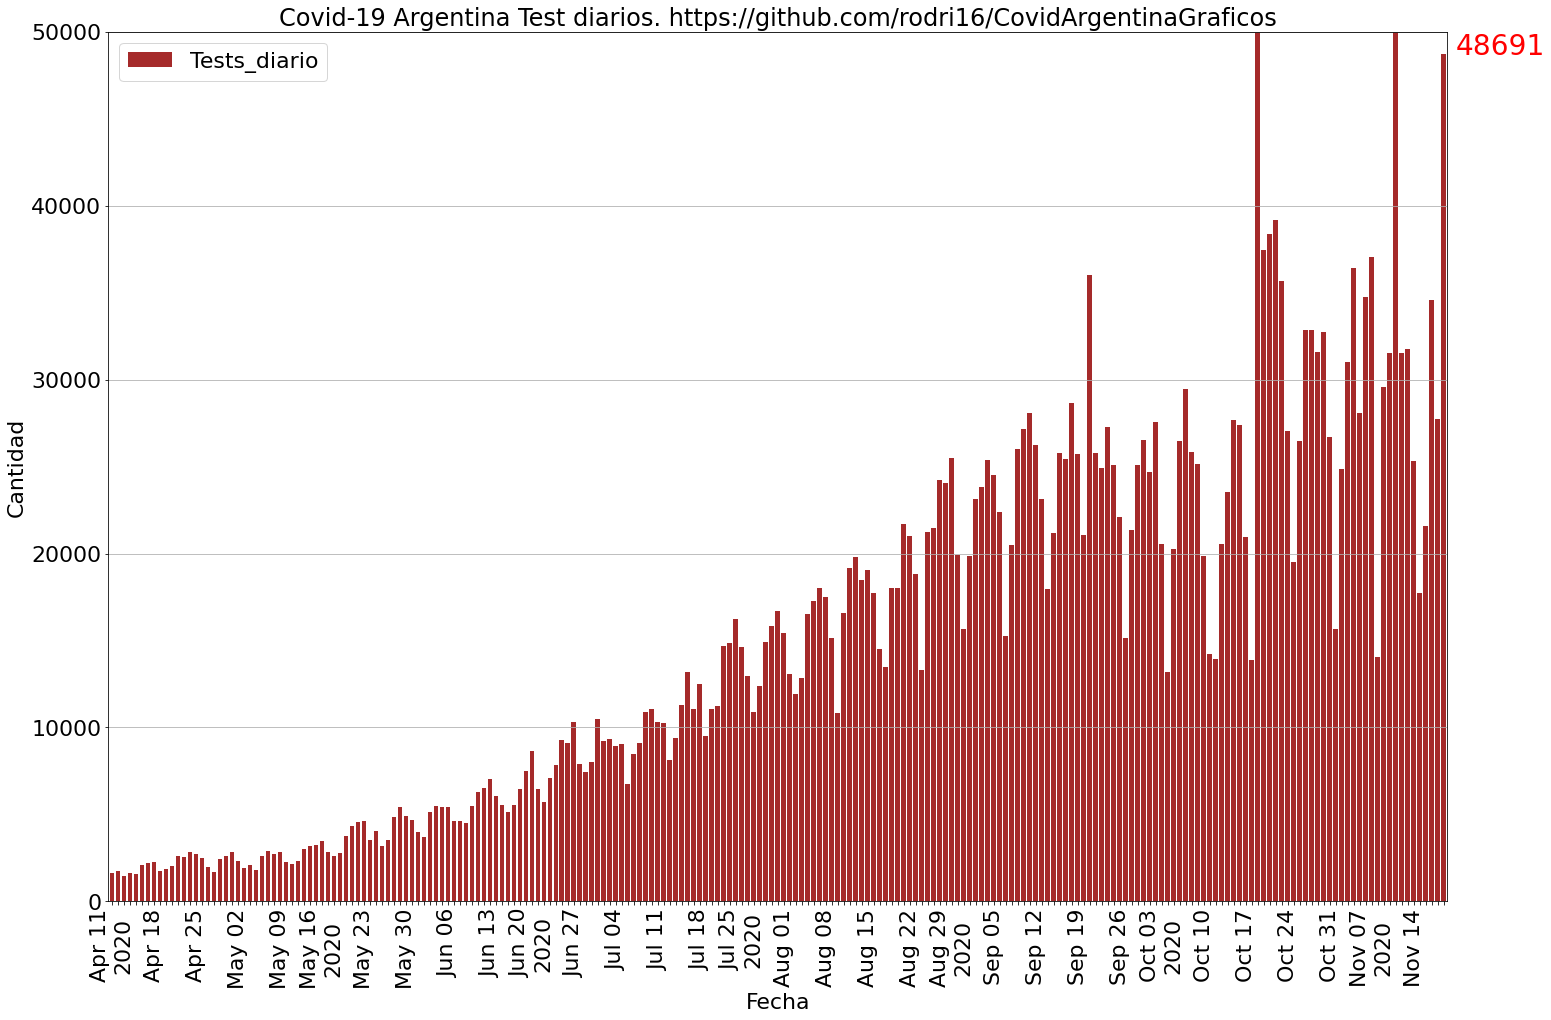

In [95]:
ax=df[df.index > '2020-4-10'].Tests_diario.plot.bar(color=['brown'],width=0.8, legend='true',figsize=(24,16), fontsize=22)

#arreglo el formato de la fecha
#plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(df[df.index > '2020-4-10'].index.to_series().dt.strftime("%d %b")))#arregla la fecha

# Make most of the ticklabels empty so the labels don't get too crowded
import matplotlib.ticker as ticker
ticklabels = ['']*len(df[df.index > '2020-4-10'].index)
# Every 7th ticklable shows the month and day
ticklabels[::7] = [item.strftime('%b %d') for item in df[df.index > '2020-4-10'].index[::7]]
# Every 35th ticklabel includes the year
ticklabels[::35] = [item.strftime('%b %d\n%Y') for item in df[df.index > '2020-4-10'].index[::35]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))

#agrego grid
plt.grid(axis='y')
plt.legend(fontsize=22,loc='upper left')
plt.xlabel('Fecha',fontsize=22)
plt.title('Covid-19 Argentina Test diarios. https://github.com/rodri16/CovidArgentinaGraficos',fontsize=24)
plt.ylabel('Cantidad', fontsize=22)
plt.gca().set_ylim(bottom=0, top=50000)

#numeros arriba de la barra
#for p in ax.patches:
#    ax.annotate(int(p.get_height()), (p.get_x() * 0.995, p.get_height() * 1.009),rotation=90, fontsize=18)

#ultimo numero
plt.annotate('%d' % df.Tests_diario.iloc[-1], xy=(1, df.Tests_diario.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',color='red',size=28)

    #salvo grafico
name='Graficos/Noviembre/TestDiarioBar_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

### Grafico Totales (el mas completo!!)

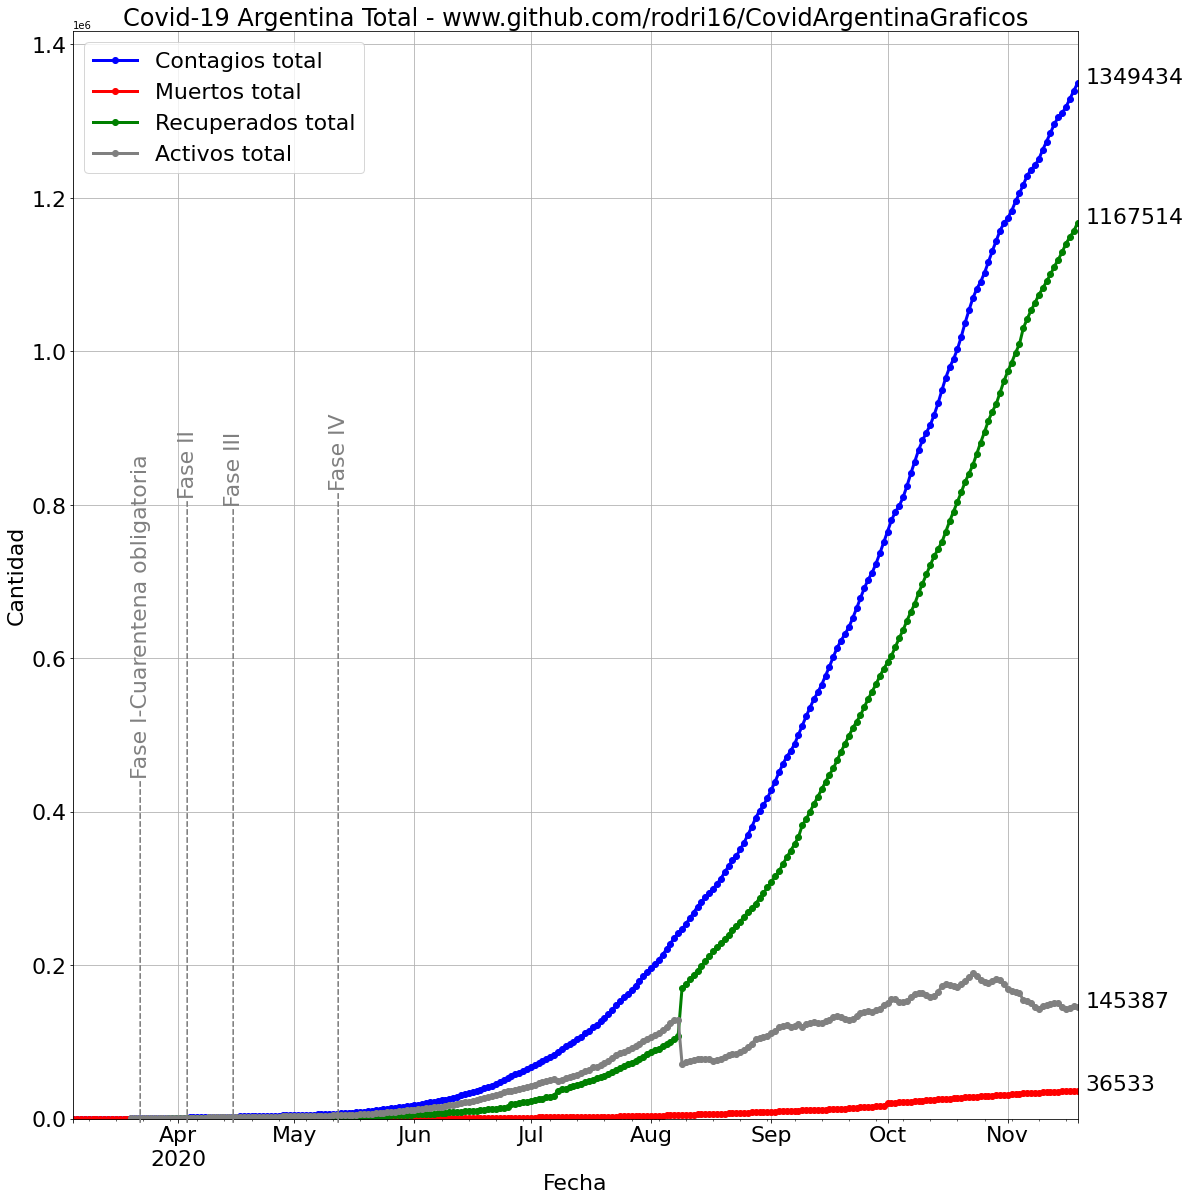

In [96]:
import matplotlib.ticker as mticker
ax=df.plot(y=['Contagios_tot','Muertos_tot','Recuperados_tot',"Activos_tot"],color=['blue','red',"green",'grey'],fontsize=22, style='-',grid='on',figsize=(18,20),linewidth=3, marker='o')
plt.title('Covid-19 Argentina Total - www.github.com/rodri16/CovidArgentinaGraficos',fontsize=24)
plt.xlabel('Fecha', fontsize=22)
plt.ylabel('Cantidad', fontsize=22)
plt.legend(['Contagios total','Muertos total','Recuperados total',"Activos total"],loc='upper left', fontsize=22);
#ax.text('2020-4-2',5800,'www.github.com/rodri16/CovidArgentinaGraficos',fontsize=10)

#agrega ultimo valor
for var in (df.Contagios_tot,df.Muertos_tot,df.Recuperados_tot):
    plt.annotate('%d' % var.max(), xy=(1, var.max()), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22)

plt.annotate('%d' % df.Activos_tot.iloc[-1], xy=(1, df.Activos_tot.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22)   
# Add labels to the plot
style = dict(size=22, color='gray')

#Texto de la cuarentena obligatoria
ax.text('2020-3-20', 10, "-------------------------------------------Fase I-Cuarentena obligatoria",rotation=90, **style)
#Texto de la Fase II
ax.text('2020-4-1', 10, "------------------------------------------------------------------------------Fase II",rotation=90, **style)
#Texto de la Fase III
ax.text('2020-4-13', 10, "-----------------------------------------------------------------------------Fase III",rotation=90, **style)
#Texto de la Fase IV
ax.text('2020-5-10', 10, "-------------------------------------------------------------------------------Fase IV",rotation=90, **style)

#ax.set_facecolor("black")
#valor minimo en y = 0
plt.gca().set_ylim(bottom=0)

name='Graficos/Noviembre/Contagios_tot_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name, bits=16)

### Grafico de totales igual al anterior pero en escala logaritmica, se pueden ver un poco mejor lo valores chicos con respecto a los grandes pero es un poco tricky

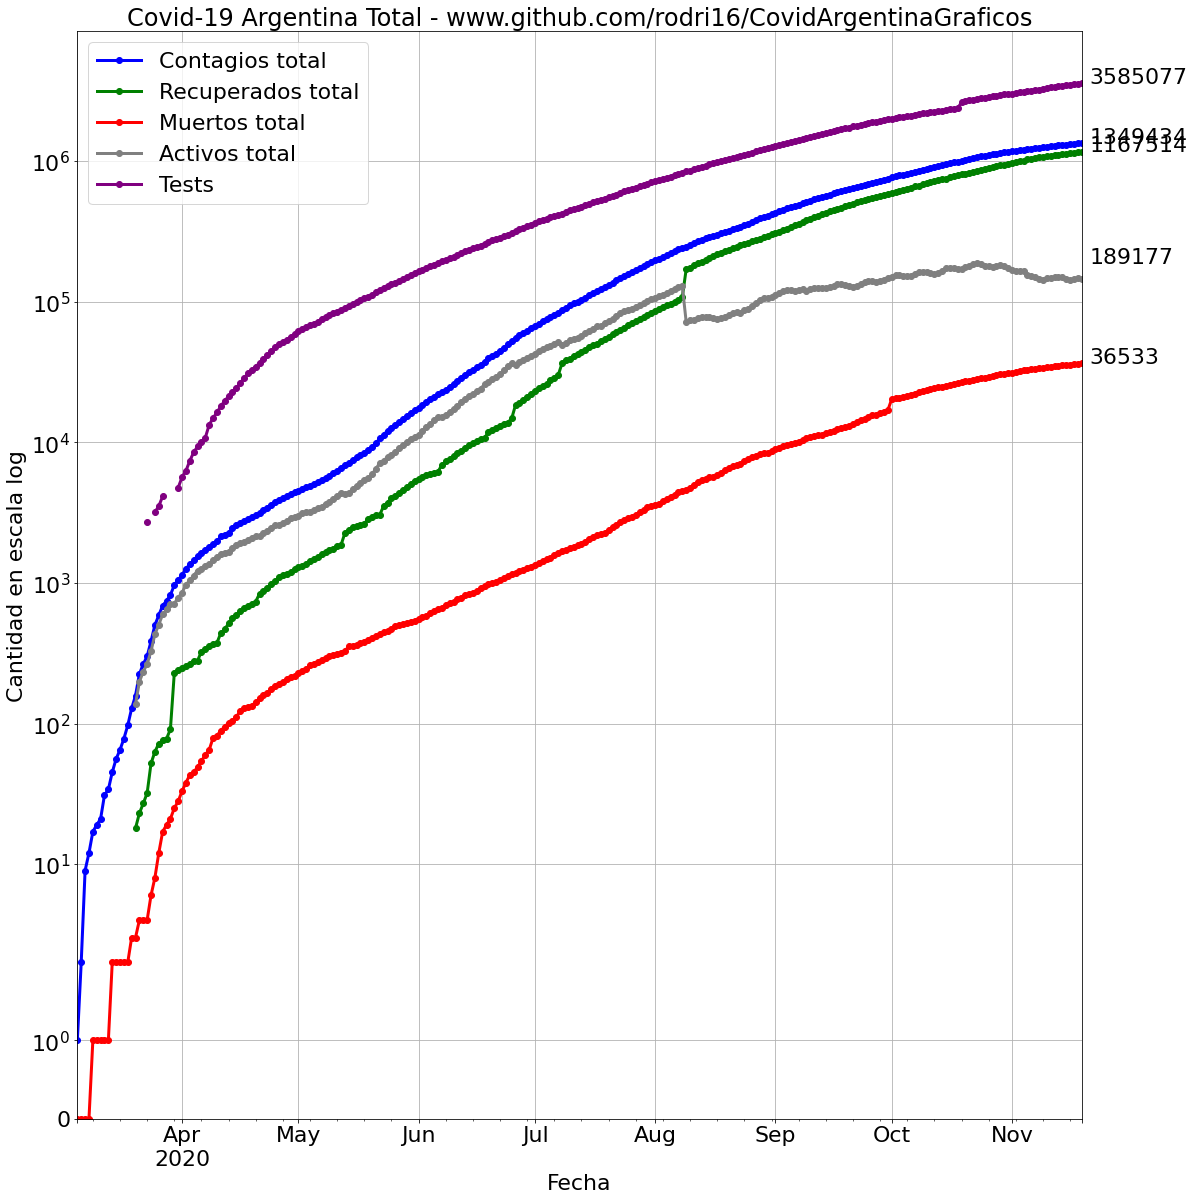

In [97]:
import matplotlib.ticker as mticker
ax=df.plot(y=['Contagios_tot','Recuperados_tot','Muertos_tot',"Activos_tot","Tests"],color=['blue',"green",'red','grey','purple'],logy="sym", style='-',grid='on',figsize=(18,20),fontsize=22,linewidth=3, marker='o')
plt.title('Covid-19 Argentina Total - www.github.com/rodri16/CovidArgentinaGraficos',fontsize=24)
plt.xlabel('Fecha', fontsize=22)
plt.ylabel('Cantidad en escala log', fontsize=22)
plt.legend(['Contagios total','Recuperados total','Muertos total',"Activos total","Tests"],loc='upper left', fontsize=22);
#ax.yaxis.set_major_formatter(mticker.ScalarFormatter())


for var in (df.Contagios_tot,df.Recuperados_tot,df.Muertos_tot,df.Activos_tot,df.Tests):
    plt.annotate('%d' % var.max(), xy=(1, var.max()), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points', fontsize=22)

plt.gca().set_ylim(bottom=0)

name='Graficos/Noviembre/Contagios_totTests_log'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

### Subplots de los totales

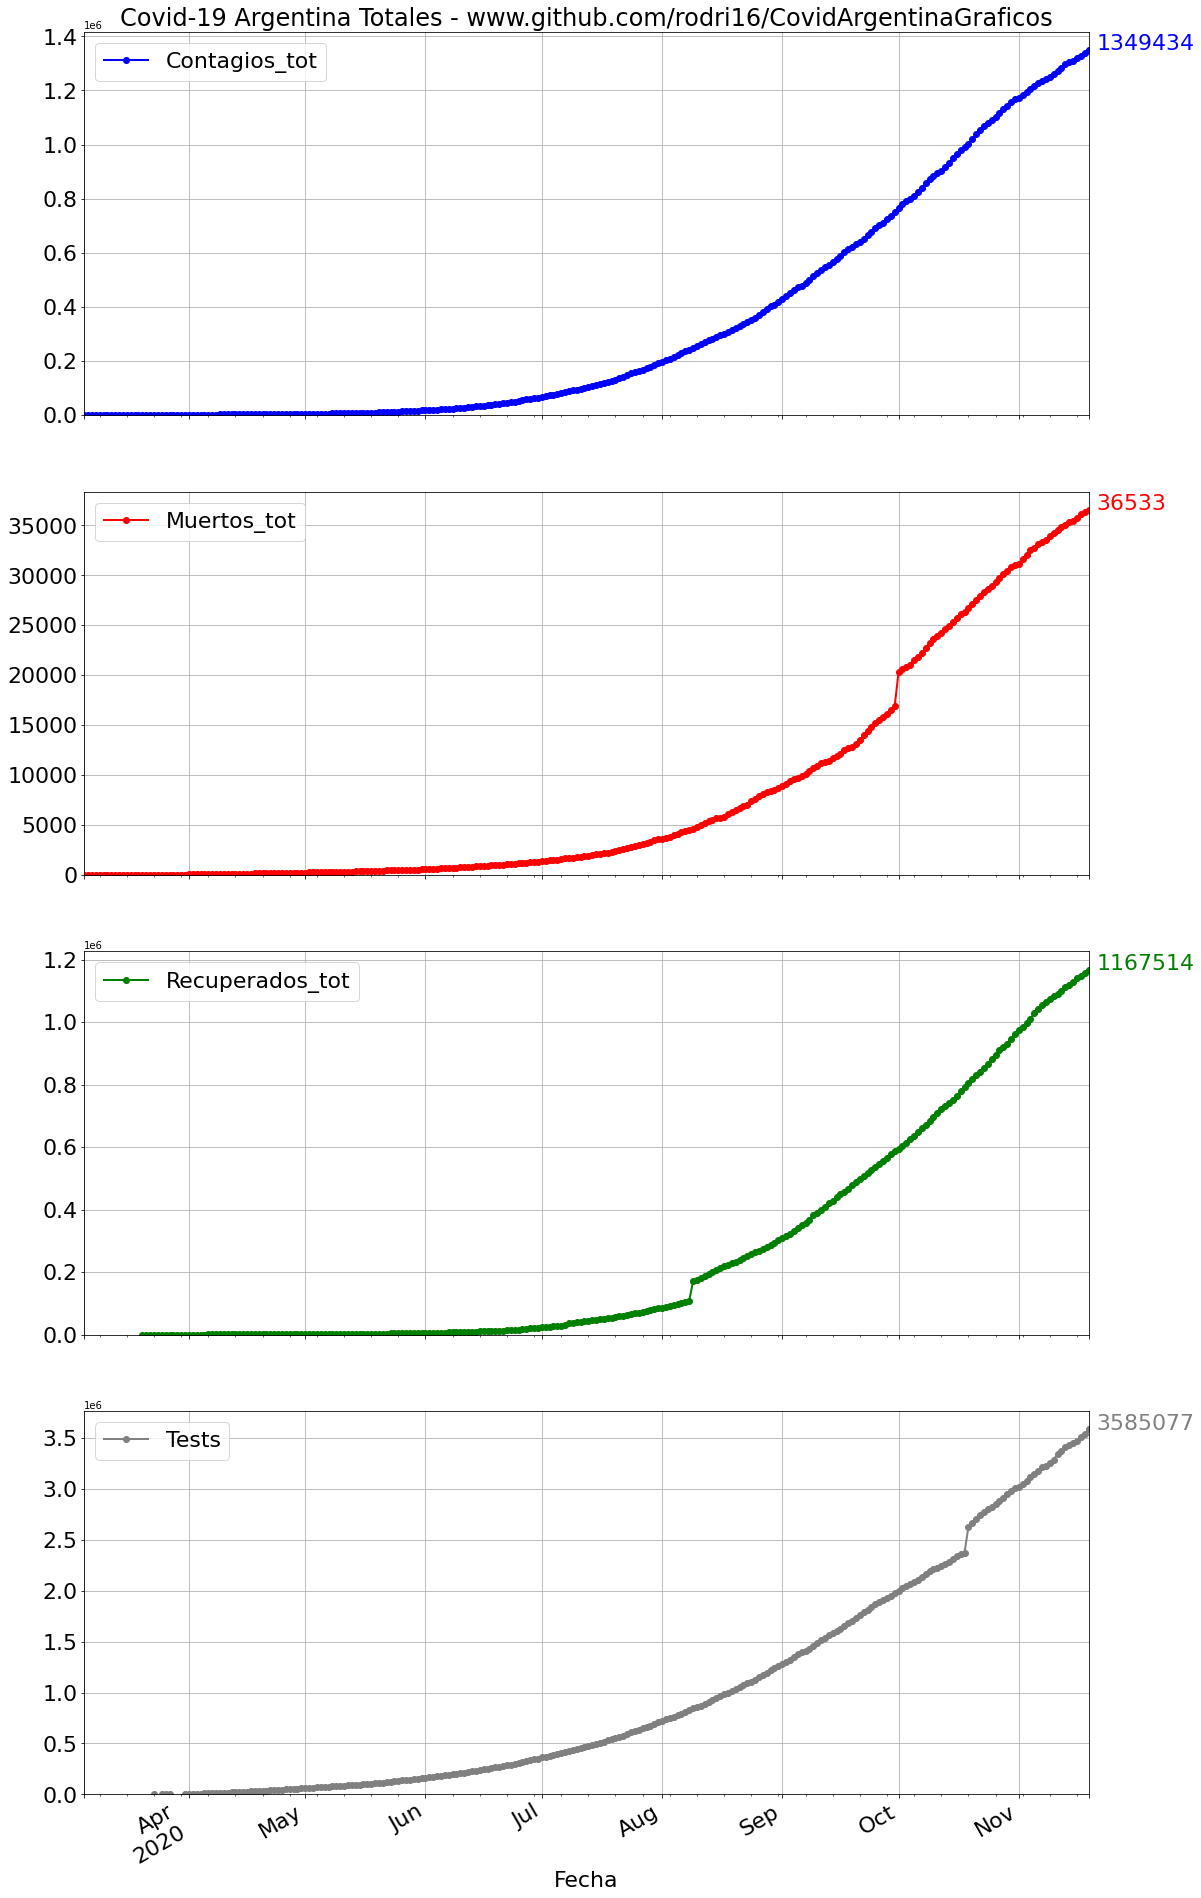

In [98]:
ax=df.plot(y=['Contagios_tot','Muertos_tot', 'Recuperados_tot',"Tests"],color=['blue','red','green','grey'],figsize=(18,36),subplots='true',style='.-',grid='on',linewidth=2, marker='o',fontsize=22)#df[df['Contagios_tot'] > 100]

plt.xlabel('Fecha', fontsize=22)

ax[0].set_title('Covid-19 Argentina Totales - www.github.com/rodri16/CovidArgentinaGraficos',fontsize=24)

ax[0].annotate('%d' % df.Contagios_tot.iloc[-1], xy=(1, df.Contagios_tot.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="blue")  
ax[0].set_ylim(bottom=0)
ax[0].legend(fontsize=22)

ax[2].annotate('%d' % df.Recuperados_tot.iloc[-1], xy=(1, df.Recuperados_tot.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="green") 
ax[2].set_ylim(bottom=0)
ax[2].legend(fontsize=22)

ax[1].annotate('%d' % df.Muertos_tot.iloc[-1], xy=(1, df.Muertos_tot.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="red") 
ax[1].set_ylim(bottom=0)
ax[1].legend(fontsize=22)

ax[3].annotate('%d' % df.Tests.iloc[-1], xy=(1, df.Tests.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="grey") 
ax[3].set_ylim(bottom=0)
ax[3].legend(fontsize=22)
name='Graficos/Noviembre/Todos_tot_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

### Relacion entre nuevos contagios y gente testeada

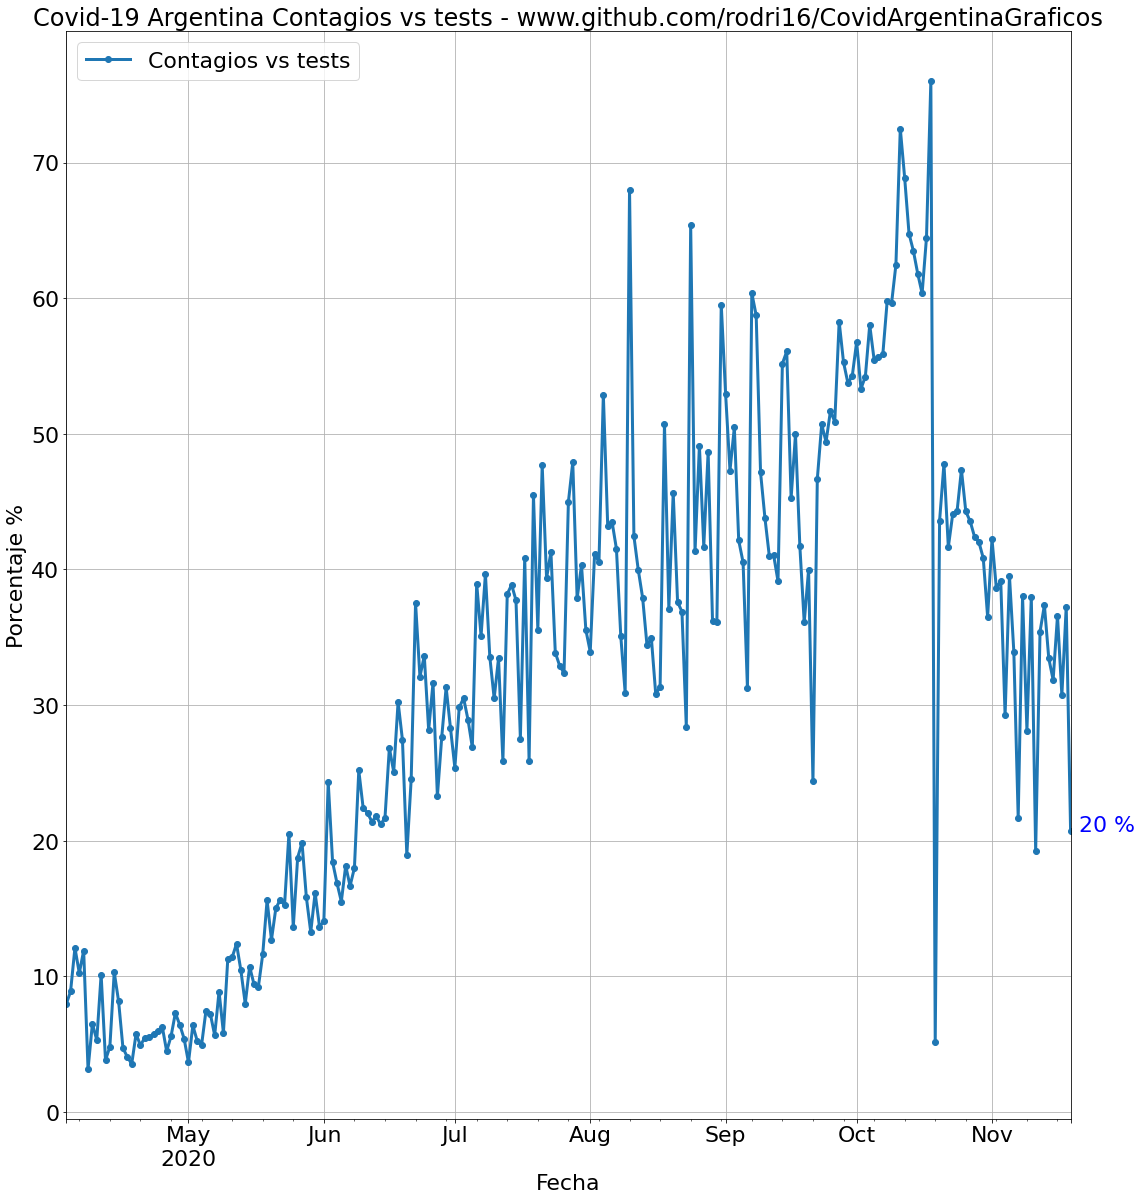

In [99]:
df['cont_test']=df['Contagios']/df['Tests_diario']*100
df[df.index > '2020-4-2']['cont_test'].plot(legend='true',style='-',grid='on',figsize=(18,20),linewidth=3, marker='o', fontsize=22)
plt.title('Covid-19 Argentina Contagios vs tests - www.github.com/rodri16/CovidArgentinaGraficos',fontsize=24)
plt.legend(['Contagios vs tests'],loc='upper left', fontsize=22);
plt.ylabel('Porcentaje %', fontsize=22)
plt.xlabel('Fecha',fontsize=22)
plt.annotate('%d %%' % df.cont_test.iloc[-1], xy=(1, df.cont_test.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="blue") 

name='Graficos/Noviembre/Tasa_Cont_Test'+df.index[-1].strftime("%d%b")#+'.svg'#str(df.index[-1])+'.eps'
plt.savefig(name)

### Meto todos los datos en una tabla

In [100]:
name='csv _datos_completos/Noviembre/Covid_arg_completo'+df.index[-1].strftime("%d%b")+'.csv'#str(df.index[-1])
df.to_csv(name, index=True)

In [101]:
df.tail(5)

,Contagios,Muertos,Recuperados_tot,Tests,Recuperados,Tests_diario,Activos,Contagios_tot,Muertos_tot,Activos_tot,Contagios_MA,Recuperados_MA,Muertos_MA,Tests_diario_MA,cont_test
Fecha,,,,,,,,,,,,,,,
2020-11-15,5645,128,"1,129,102","3,452,519","9,736","17,718","-4,219",1310491,35435,"145,954","9,758","9,456",268,"31,981",32
2020-11-16,7893,292,"1,140,196","3,474,091","11,094","21,572","-3,493",1318384,35727,"142,461","9,698","9,517",260,"30,839",37
2020-11-17,10621,379,"1,148,833","3,508,664","8,637","34,573","1,605",1329005,36106,"144,066","9,504","9,562",275,"31,273",31
2020-11-18,10332,241,"1,156,474","3,536,386","7,641","27,722","2,450",1339337,36347,"146,516","9,426","9,348",259,"27,165",37
2020-11-19,10097,186,"1,167,514","3,585,077","11,040","48,691","-1,129",1349434,36533,"145,387","9,274","9,619",250,"29,618",21
